# Homework 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


In [5]:
df.describe()

,number_of_courses_viewed,annual_income,interaction_count,lead_score,converted
count,1462.000000,1281.000000,1462.000000,1462.000000,1462.000000
mean,2.031464,59886.273224,2.976744,0.506108,0.619015
std,1.449717,15070.140389,1.681564,0.288465,0.485795
min,0.000000,13929.000000,0.000000,0.000000,0.000000
25%,1.000000,49698.000000,2.000000,0.262500,0.000000
50%,2.000000,60148.000000,3.000000,0.510000,1.000000
75%,3.000000,69639.000000,4.000000,0.750000,1.000000
max,9.000000,109899.000000,11.000000,1.000000,1.000000


In [6]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [7]:
if df.isnull().values.any():
    categorical_cols = df.select_dtypes(include=['object']).columns
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    
    df[categorical_cols] = df[categorical_cols].fillna('NA')
    df[numerical_cols] = df[numerical_cols].fillna(0.0)

In [8]:
df.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

## Question 1

In [9]:
df['industry'].mode()

0    retail
Name: industry, dtype: object

In [10]:
df['industry'].value_counts()

industry
retail           203
finance          200
other            198
healthcare       187
education        187
technology       179
manufacturing    174
NA               134
Name: count, dtype: int64

## Question 2

In [11]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [12]:
corr =df.corr(numeric_only=True)

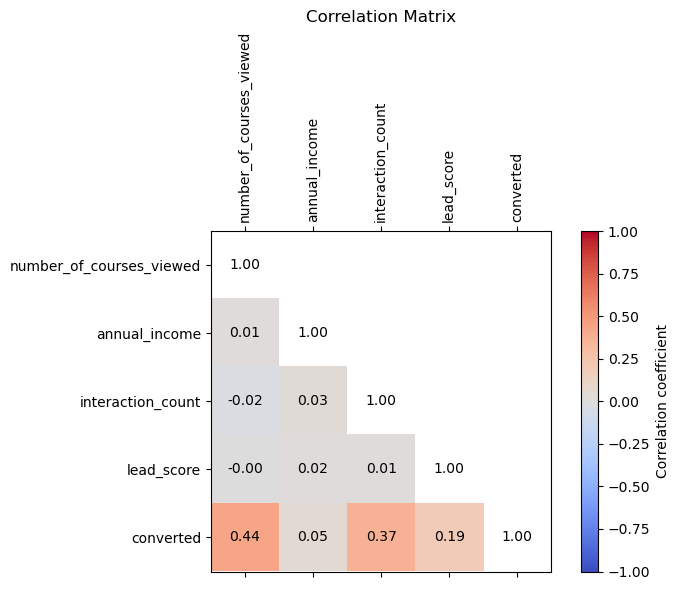

In [13]:
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(np.where(mask, np.nan, corr), cmap='coolwarm', vmin=-1, vmax=1)

for i in range(corr.shape[0]):
    for j in range(i+1):
        ax.text(j, i, f"{corr.iloc[i, j]:.2f}", va='center', ha='center', color='black')

plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar(cax, label='Correlation coefficient')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


In [14]:
corr_matrix = df.corr(numeric_only=True).abs()

cols = [col for col in corr_matrix.columns if col != 'converted']
corr_matrix_excl = corr_matrix.loc[cols, cols]

np.fill_diagonal(corr_matrix_excl.values, 0)

corr_pairs = []

for i in range(len(corr_matrix_excl.columns)):
    for j in range(i+1, len(corr_matrix_excl.columns)):
        col1 = corr_matrix_excl.columns[i]
        col2 = corr_matrix_excl.columns[j]
        value = corr_matrix_excl.iloc[i, j]
        corr_pairs.append(((col1, col2), value))

corr_pairs_sorted = sorted(corr_pairs, key=lambda x: x[1], reverse=True)

for (col1, col2), value in corr_pairs_sorted:
    print(f"{col1} & {col2}: correlation = {value:.2f}")

annual_income & interaction_count: correlation = 0.03
number_of_courses_viewed & interaction_count: correlation = 0.02
annual_income & lead_score: correlation = 0.02
interaction_count & lead_score: correlation = 0.01
number_of_courses_viewed & annual_income: correlation = 0.01
number_of_courses_viewed & lead_score: correlation = 0.00


## Question 3

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [16]:
X_train = df_train.drop(columns=['converted'])
y_train = df_train['converted']

X_val = df_val.drop(columns=['converted'])
y_val = df_val['converted']

X_test = df_test.drop(columns=['converted'])
y_test = df_test['converted']

In [17]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [18]:
from sklearn.metrics import mutual_info_score

categorical_vars = ['lead_source', 'industry', 'employment_status', 'location']
mi_scores = {}

for col in categorical_vars:
    X = X_train[col].fillna('NA')
    mi = mutual_info_score(X, y_train)
    mi_scores[col] = round(mi, 2)

for col, score in mi_scores.items():
    print(f"{col}: {score}")

max_mi_var = max(mi_scores, key=mi_scores.get)
print(f"\nVariable with biggest MI score: {max_mi_var}")


lead_source: 0.04
industry: 0.01
employment_status: 0.01
location: 0.0

Variable with biggest MI score: lead_source


## Question 4 

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

categorical = ['lead_source', 'industry', 'employment_status', 'location']

# One-hot encode categorical features
X_train_enc = pd.get_dummies(X_train, columns=categorical, dummy_na=True)
X_val_enc = pd.get_dummies(X_val, columns=categorical, dummy_na=True)

# Align columns (in case validation set is missing any categories)
X_train_enc, X_val_enc = X_train_enc.align(X_val_enc, join='left', axis=1, fill_value=0)

# Train the model
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train_enc, y_train)

# Make predictions
y_pred = model.predict(X_val_enc)
acc = accuracy_score(y_val, y_pred)
print(round(acc, 2))

# Closest answer: 0.74

0.7


## Question 5

In [20]:
df.columns

Index(['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income',
       'employment_status', 'location', 'interaction_count', 'lead_score',
       'converted'],
      dtype='object')

In [21]:
features = df.columns.drop('converted')

# One-hot encode categorical features
X_train_enc = pd.get_dummies(X_train, columns=categorical, dummy_na=True)
X_val_enc = pd.get_dummies(X_val, columns=categorical, dummy_na=True)
X_train_enc, X_val_enc = X_train_enc.align(X_val_enc, join='left', axis=1, fill_value=0)

# Find original accuracy
model_full = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model_full.fit(X_train_enc, y_train)
y_pred_full = model_full.predict(X_val_enc)
acc_full = accuracy_score(y_val, y_pred_full)

diffs = {}

# Drop each feature and check accuracy
for feature in features:
    if feature in categorical:
        col_drop = [col for col in X_train_enc.columns if col.startswith(feature + '_')]
    else:
        col_drop = [feature]
    
    X_train_drop = X_train_enc.drop(columns=col_drop)
    X_val_drop = X_val_enc.drop(columns=col_drop)
    
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train_drop, y_train)
    y_pred = model.predict(X_val_drop)
    acc = accuracy_score(y_val, y_pred)
    diff = acc_full - acc
    diffs[feature] = diff
    print(f"{feature}: accuracy diff = {diff:.4f}")

least_impact_feat = min(diffs, key=lambda k: abs(diffs[k]))
print(f"\nFeature with smallest difference: {least_impact_feat}")


lead_source: accuracy diff = -0.0034
industry: accuracy diff = 0.0000
number_of_courses_viewed: accuracy diff = 0.1433
annual_income: accuracy diff = -0.1536
employment_status: accuracy diff = 0.0034
location: accuracy diff = -0.0102
interaction_count: accuracy diff = 0.1433
lead_score: accuracy diff = -0.0068

Feature with smallest difference: industry


## Question 6

In [22]:
X_train_enc.head()

,number_of_courses_viewed,annual_income,interaction_count,lead_score,lead_source_NA,lead_source_events,lead_source_organic_search,lead_source_paid_ads,lead_source_referral,lead_source_social_media,...,employment_status_nan,location_NA,location_africa,location_asia,location_australia,location_europe,location_middle_east,location_north_america,location_south_america,location_nan
0,0,58472.0,5,0.03,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
1,3,71738.0,6,0.77,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,3,81973.0,2,0.59,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,1,74956.0,3,0.34,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,3,59335.0,1,0.98,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [23]:
y_train.head()

0    0
1    1
2    1
3    1
4    1
Name: converted, dtype: int64

In [24]:
c_values = [0.01, 0.1, 1, 10, 100]
accuracies = {}

for c in c_values:
    model = LogisticRegression(solver='liblinear', C=c, random_state=42)
    model.fit(X_train_enc, y_train)
    y_pred = model.predict(X_val_enc)  # Use predict, not predict_proba
    acc = accuracy_score(y_val, y_pred)
    acc_rounded = round(acc, 3)
    accuracies[c] = acc_rounded
    print(f"C={c}: Validation accuracy={acc_rounded}")

best_acc = max(accuracies.values())
best_c_candidates = [c for c, acc in accuracies.items() if acc == best_acc]
best_c = min(best_c_candidates)
print(f"\nBest C (smallest with highest accuracy): {best_c}")

C=0.01: Validation accuracy=0.7
C=0.1: Validation accuracy=0.7
C=1: Validation accuracy=0.7
C=10: Validation accuracy=0.7
C=100: Validation accuracy=0.7

Best C (smallest with highest accuracy): 0.01
